In [7]:
#Linear Regression
#Simple Linear Regression
import seaborn as sn
import pandas as pd

In [10]:
#Data Collection
df = sn.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [25]:
#statistics
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


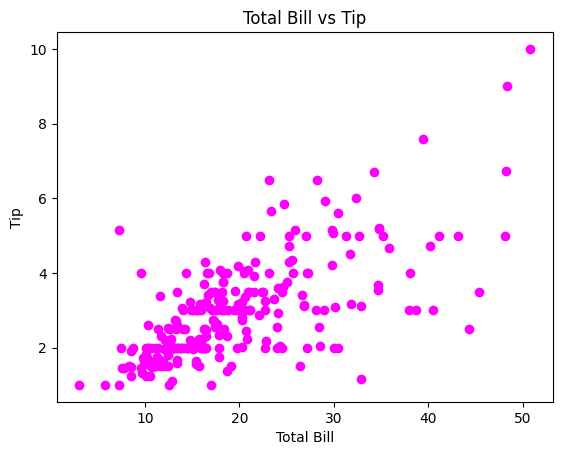

In [22]:
#Relationship Check
import matplotlib.pyplot as plt
plt.scatter(df['total_bill'],df['tip'],color='magenta')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')
plt.show()

In [23]:
# Observations:
# 1.As the bills increases tip increases
# 2.Relationship = Straight line (we can use linear regression)

In [24]:
# Feature & Target Separation
x=df[['total_bill']]#feature input
y=df['tip']#feature output

In [26]:
#Train Test Split
#Why..?
#A model must perform well on unseen data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
#Feature Standardization
#why..?
#Compare the co-efficients fairly
#avoid the dominance of Large Values
#Prepare for Ridge/Lasso
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [30]:
#NOTE
#fit only on training data
#Prevents the data leakage

In [34]:
#Train Linear Regression Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)
print("Co-efficient(m):",model.coef_[0])
print("Intercept(c):",model.intercept_)

Co-efficient(m): 0.9357171400271824
Intercept(c): 3.0877948717948724


In [35]:
y_pred=model.predict(x_test_scaled)

In [39]:
#Model Evaluation
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
print("R2 Score:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 Score: 0.5449381659234664
MSE: 0.5688142529229537


In [40]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

RMSE: 0.7541977545199626


In [41]:
#Visualize the Best fit Line

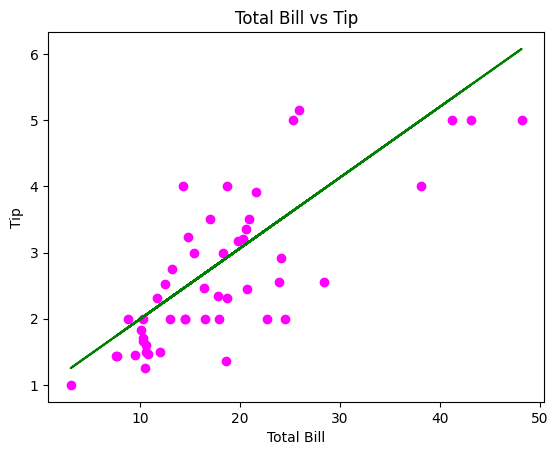

In [47]:
plt.scatter(x_test,y_test,color='magenta')
plt.plot(x_test,y_pred,color='green')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')
plt.show()

In [52]:
#User input Real Time
bill_amount=float(input("Enter the Bill Amount:"))
bill_scaled=scaler.transform([[bill_amount]])
predicted_tip=model.predict(bill_scaled)
print(f"Predicted Tip: {predicted_tip[0]:.2f}")

Enter the Bill Amount:100
Predicted Tip: 11.62


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
